In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14894922071353059756,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5760810789528772977
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4951408640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14656726918407705424
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8742078122953281116
 physical_device_desc: "device: XLA_GPU device"]

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\relea\.conda\envs\python-env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\relea\.conda\envs\python-env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes)

In [3]:
x_train = sequence.pad_sequences(x_train, maxlen=100) #100으로 패딩시키는거 - 100넘는거 자르고, 안되는건 0으로
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [4]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1)) # 마스크사이즈를 5로(좌우 2개씩 날아감), default가 valid, strides는 한칸씩 이동한다는거(디폴트1) 
model.add(MaxPooling1D(pool_size=4)) #1차원
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
hist = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [6]:
print("Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

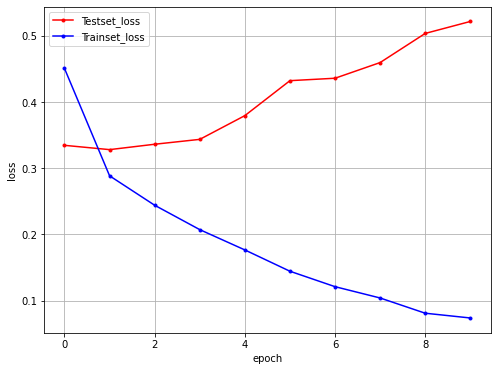

In [11]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()